## Python Regression Example

In [9]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import statsmodels.formula.api as sm
import sklearn.linear_model
import scipy, scipy.stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
%matplotlib inline

In [12]:
# Set up the API call to get daily weather data for Toronto from Environment Canada for 2015
url = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=31688&Year=2015&timeframe=2&submit=Download+Data"

In [14]:
# Download the data
toronto_island_weather_2015 = pd.read_csv(url, skiprows=24)
toronto_island_weather_2015

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2015-01-01,2015,1,1,NaN,-0.9,NaN,-6.9,NaN,-3.9,...,NaN,M,0.0,NaN,NaN,NaN,NaN,M,NaN,M
1,2015-01-02,2015,1,2,NaN,-0.5,NaN,-4.0,NaN,-2.3,...,NaN,M,0.0,NaN,NaN,NaN,NaN,M,NaN,M
2,2015-01-03,2015,1,3,NaN,2.8,NaN,-3.5,NaN,-0.4,...,NaN,M,12.3,NaN,NaN,NaN,NaN,M,NaN,M
3,2015-01-04,2015,1,4,NaN,5.1,NaN,-4.7,NaN,0.2,...,NaN,M,10.8,NaN,NaN,NaN,NaN,M,NaN,M
4,2015-01-05,2015,1,5,NaN,-4.6,NaN,-12.5,NaN,-8.6,...,NaN,M,0.2,NaN,NaN,NaN,NaN,M,NaN,M
5,2015-01-06,2015,1,6,NaN,-7.7,NaN,-12.1,NaN,-9.9,...,NaN,M,0.0,NaN,NaN,NaN,NaN,M,NaN,M
6,2015-01-07,2015,1,7,NaN,-8.4,NaN,-17.6,NaN,-13.0,...,NaN,M,0.3,NaN,NaN,NaN,NaN,M,NaN,M
7,2015-01-08,2015,1,8,NaN,-7.7,NaN,-14.8,NaN,-11.3,...,NaN,M,0.7,NaN,NaN,NaN,NaN,M,NaN,M
8,2015-01-09,2015,1,9,NaN,-5.1,NaN,-12.3,NaN,-8.7,...,NaN,M,0.9,NaN,NaN,NaN,NaN,M,NaN,M
9,2015-01-10,2015,1,10,NaN,-8.9,NaN,-14.6,NaN,-11.8,...,NaN,M,0.0,NaN,NaN,NaN,NaN,M,NaN,M


In [16]:
toronto_island_weather_2015["Date"] = pd.to_datetime(toronto_island_weather_2015["Date/Time"])
toronto_island_weather_2015.ix[0].Date

/Users/sergiynokhrin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Timestamp('2015-01-01 00:00:00')

In [17]:
# Get data on watermain breaks in Toronto
breaks = pd.read_excel("WatermainBreaks.xlsx", usecols=[0], names=["Date"])
breaks

,Date
0,1990-01-01
1,1990-01-01
2,1990-01-01
3,1990-01-01
4,1990-01-01
5,1990-01-01
6,1990-01-01
7,1990-01-01
8,1990-01-01
9,1990-01-01


In [22]:
# Count the breaks per day and limit the dataset to 2015
counts = breaks.Date.value_counts()
counts_2015 = counts[pd.date_range(start="2015-01-01", end="2015-12-31")]
#counts_2015

2015-01-01     6.0
2015-01-02     3.0
2015-01-03     2.0
2015-01-04     8.0
2015-01-05    11.0
2015-01-06     2.0
2015-01-07     4.0
2015-01-08     3.0
2015-01-09     7.0
2015-01-10     2.0
2015-01-11     3.0
2015-01-12     7.0
2015-01-13    10.0
2015-01-14     5.0
2015-01-15     5.0
2015-01-16     8.0
2015-01-17     5.0
2015-01-18     2.0
2015-01-19     6.0
2015-01-20     6.0
2015-01-21     7.0
2015-01-22    13.0
2015-01-23    10.0
2015-01-24     1.0
2015-01-25     5.0
2015-01-26     9.0
2015-01-27     7.0
2015-01-28     3.0
2015-01-29     4.0
2015-01-30     9.0
              ... 
2015-12-02     2.0
2015-12-03     1.0
2015-12-04     3.0
2015-12-05     3.0
2015-12-06     1.0
2015-12-07     6.0
2015-12-08     3.0
2015-12-09     5.0
2015-12-10     4.0
2015-12-11     3.0
2015-12-12     1.0
2015-12-13     2.0
2015-12-14     1.0
2015-12-15     NaN
2015-12-16     2.0
2015-12-17     1.0
2015-12-18     4.0
2015-12-19     2.0
2015-12-20     1.0
2015-12-21     5.0
2015-12-22     2.0
2015-12-23  

In [26]:
break_counts_2015 = counts_2015.to_frame().reset_index()
break_counts_2015.columns
break_counts_2015

,index,Date
0,2015-01-01,6.0
1,2015-01-02,3.0
2,2015-01-03,2.0
3,2015-01-04,8.0
4,2015-01-05,11.0
5,2015-01-06,2.0
6,2015-01-07,4.0
7,2015-01-08,3.0
8,2015-01-09,7.0
9,2015-01-10,2.0


In [27]:
break_counts = counts_2015.to_frame().reset_index().rename(columns={"Date": "Count", "index": "Date"})
break_counts.columns

Index(['Date', 'Count'], dtype='object')

In [28]:
break_counts_and_temps = break_counts.merge(toronto_island_weather_2015, left_on="Date", right_on="Date", how="left")[["Date", "Count", "Min Temp (°C)"]]
break_counts_and_temps

,Date,Count,Min Temp (°C)
0,2015-01-01,6.0,-6.9
1,2015-01-02,3.0,-4.0
2,2015-01-03,2.0,-3.5
3,2015-01-04,8.0,-4.7
4,2015-01-05,11.0,-12.5
5,2015-01-06,2.0,-12.1
6,2015-01-07,4.0,-17.6
7,2015-01-08,3.0,-14.8
8,2015-01-09,7.0,-12.3
9,2015-01-10,2.0,-14.6


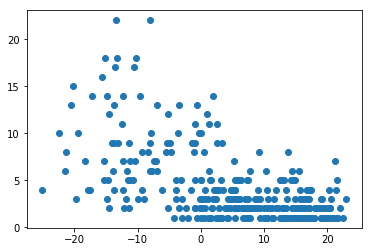

In [29]:
plt.scatter(x=break_counts_and_temps["Min Temp (°C)"], y=break_counts_and_temps["Count"])

In [30]:
#break_counts_and_temps["Date"]

0     2015-01-01
1     2015-01-02
2     2015-01-03
3     2015-01-04
4     2015-01-05
5     2015-01-06
6     2015-01-07
7     2015-01-08
8     2015-01-09
9     2015-01-10
10    2015-01-11
11    2015-01-12
12    2015-01-13
13    2015-01-14
14    2015-01-15
15    2015-01-16
16    2015-01-17
17    2015-01-18
18    2015-01-19
19    2015-01-20
20    2015-01-21
21    2015-01-22
22    2015-01-23
23    2015-01-24
24    2015-01-25
25    2015-01-26
26    2015-01-27
27    2015-01-28
28    2015-01-29
29    2015-01-30
         ...    
335   2015-12-02
336   2015-12-03
337   2015-12-04
338   2015-12-05
339   2015-12-06
340   2015-12-07
341   2015-12-08
342   2015-12-09
343   2015-12-10
344   2015-12-11
345   2015-12-12
346   2015-12-13
347   2015-12-14
348   2015-12-15
349   2015-12-16
350   2015-12-17
351   2015-12-18
352   2015-12-19
353   2015-12-20
354   2015-12-21
355   2015-12-22
356   2015-12-23
357   2015-12-24
358   2015-12-25
359   2015-12-26
360   2015-12-27
361   2015-12-28
362   2015-12-

In [30]:
# Set up the regression design matrix for statsmodels
dm = break_counts_and_temps.dropna().copy() # statsmodels doesn't like NaN's; need to copy so dm is not a view (or next line won't work)
dm["Intercept"] = np.ones((len(dm),)) # statsmodels requires a column of 1's if you want an intercept
dm = dm.rename(columns={"Min Temp (°C)": "Min Temp (C)"}) # it also doesn't like funny characters like ° in column names (may be ok in Python 3)

Y = dm["Count"]
X = dm[["Min Temp (C)", "Intercept"]]

# Run the regression
result = sm.OLS(Y, X).fit()

# Show the results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     169.6
Date:                Tue, 26 Jun 2018   Prob (F-statistic):           2.30e-31
Time:                        00:20:02   Log-Likelihood:                -822.99
No. Observations:                 320   AIC:                             1650.
Df Residuals:                     318   BIC:                             1658.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Min Temp (C)    -0.2080      0.016    -13.023      0.000      -0.239      -0.177
Intercept        5.1763      0.193     26.875      0.000       4.797       5.555
==============================================================================
Omnibus:                       89.560   Durbin-Watson:                   1.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.085
Skew:                           1.330   Prob(JB):                     1.33e-49
Kurtosis:                       6.131   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
X

,Min Temp (C),Intercept
0,-6.9,1.0
1,-4.0,1.0
2,-3.5,1.0
3,-4.7,1.0
4,-12.5,1.0
5,-12.1,1.0
6,-17.6,1.0
7,-14.8,1.0
8,-12.3,1.0
9,-14.6,1.0


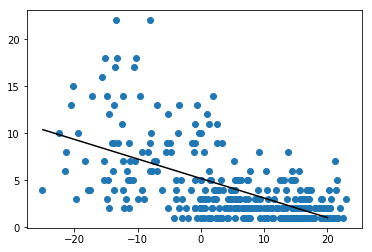

In [32]:
plt.scatter(x=break_counts_and_temps["Min Temp (°C)"], y=break_counts_and_temps["Count"])
plt.plot([-25, 20], [5.1763+25*0.208, 5.1763-20*0.208], 'k-')

In [34]:
# scikit-learn needs the data organized as numpy vectors
Y = dm["Count"]
X = dm["Min Temp (C)"].values.reshape(-1, 1)
model = sklearn.linear_model.LinearRegression().fit(X, Y)
print(model.coef_)
print(model.intercept_)

[-0.20803438]
5.17634032477


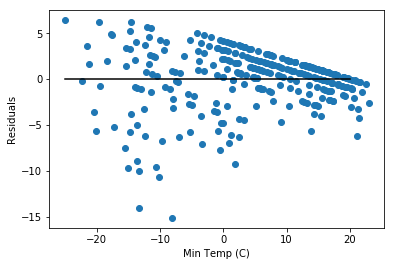

In [35]:
# Residual plot
scatter(X, model.predict(X) - Y)
plt.xlabel("Min Temp (C)")
plt.ylabel("Residuals")
plt.plot([-25, 20], [0, 0], 'k-')